#### Drop outliers, StandardScaler, PCA and Used RFReg, XGBReg
#### Not use Stdsc and PCA when use RF or XGB...
#### Next step : use 5 features(with high importances in 20210812_EDA) and Do PolyLinear, RF, XGB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [3]:
df = pd.read_csv('data/preprocessed_0813.csv')
df.head()

,realized_volatility,seconds_count,seconds_right_skew,seconds_skewness,seconds_kurtosis,wap_skewness,wap_kurtosis,bid_size1_skewness,bid_size1_max,bid_size1_mean,ask_size1_skewness,ask_size1_max,ask_size1_mean,bid_size2_skewness,ask_size2_skewness,row_id,size_max,size_sum,order_count_max,target
0,0.004106,302.0,152.841727,0.510418,-1.181185,-0.729681,3.300160,-0.803095,500.0,78.264901,-0.246879,228.0,74.579470,-0.669089,-0.426180,0-5,499.0,3179.0,12.0,0.004136
1,0.001507,200.0,147.965217,-0.362378,-1.001272,-0.053591,0.563174,0.288387,402.0,149.965000,1.345276,400.0,71.145000,1.269870,-0.172575,0-11,280.0,1289.0,6.0,0.001445
2,0.002468,188.0,159.897059,0.506732,-1.216982,-0.934322,0.324836,-0.164424,304.0,96.132979,1.279381,449.0,131.037234,0.538682,-1.122790,0-16,391.0,2161.0,8.0,0.002168
3,0.002708,120.0,120.509434,-0.032548,-1.013334,0.792628,0.111513,0.448781,370.0,114.458333,0.480632,400.0,120.800000,1.293843,0.790816,0-31,450.0,1962.0,15.0,0.002195
4,0.001932,176.0,131.988764,-0.402382,-1.151718,0.168761,-1.067718,0.579404,402.0,119.823864,0.121758,333.0,88.477273,-0.434153,1.519461,0-62,341.0,1791.0,17.0,0.001747


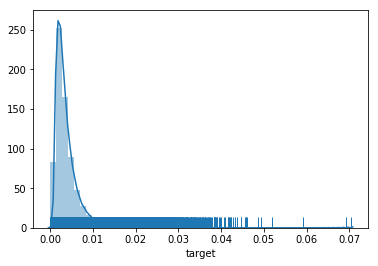

In [4]:
sns.distplot(df.target, rug = True, kde = True)

In [5]:
X, y = df.drop(['row_id','target'], axis=1), df['target']
print(X.shape)
print(y.shape)

(428932, 18)
(428932,)


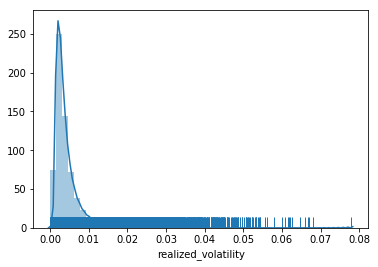

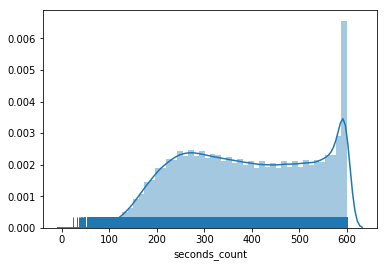

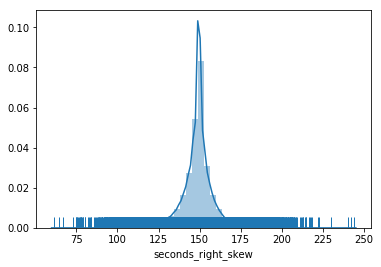

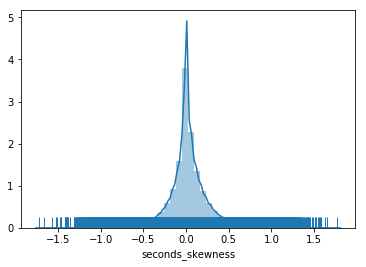

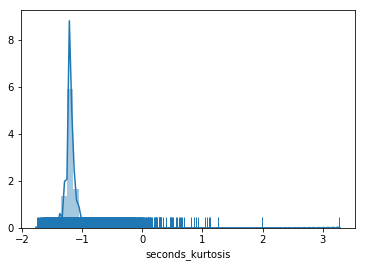

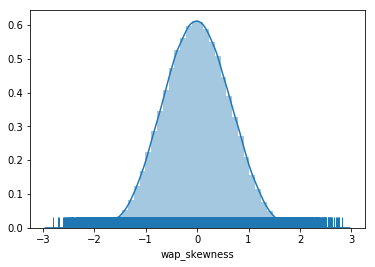

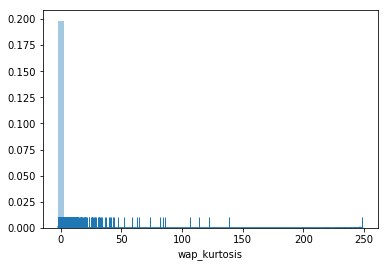

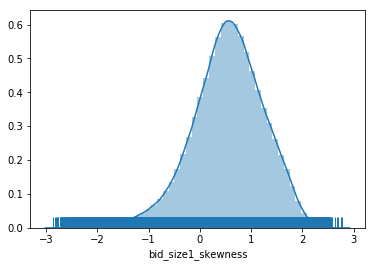

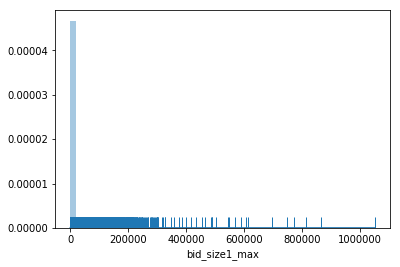

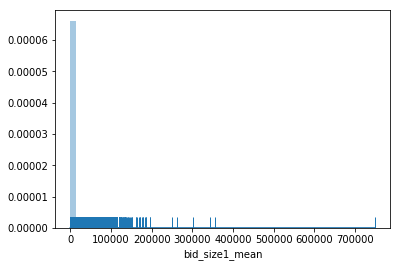

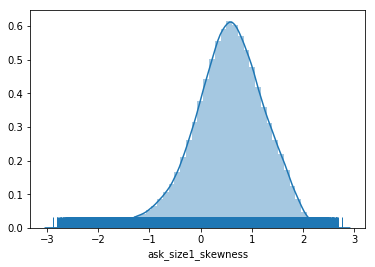

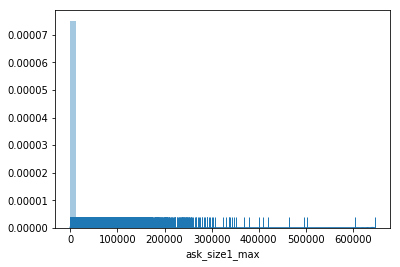

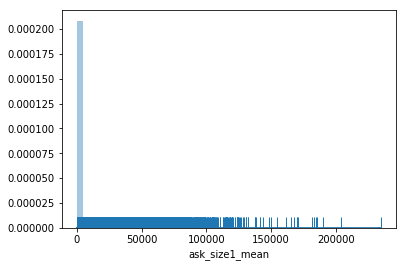

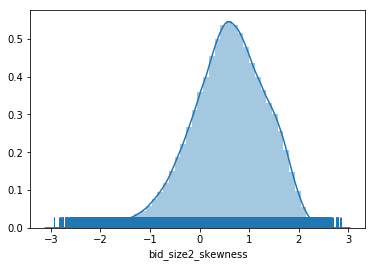

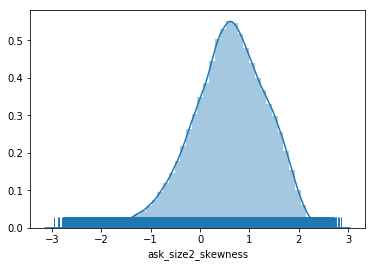

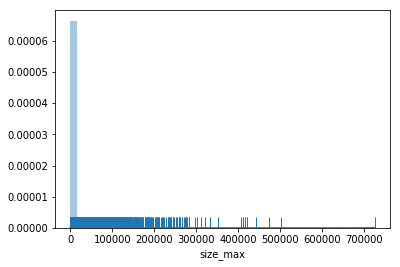

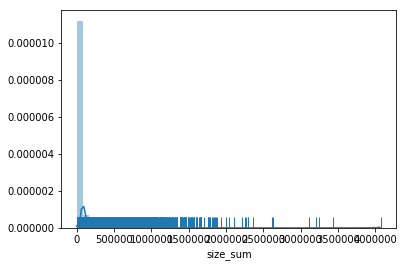

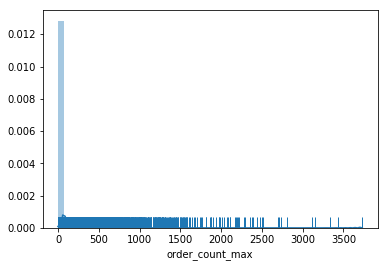

In [7]:
for col in X.columns :
    sns.distplot(X[col], rug = True)
    plt.show()

In [8]:
# realized_volatility >= 0.07
# seconds_kurtosis >= 1.5
# wap_kurtosis >= 125
# bid_size1_max >= 80000
# bid_size1_mean >= 400000
# ask_size1_max >= 500000
# ask_size1_mean >= 200000
# size_max >= 500000
# size_sum >= 2500000
# order_count_max >= 3000
# regard these datas as outliers, and drop them.

In [9]:
drop_indexes = X[(X.realized_volatility>=0.07) |
         (X.seconds_kurtosis>=1.5) |
         (X.wap_kurtosis>=125) |
         (X.bid_size1_max>=80000) |
         (X.bid_size1_mean>=400000) |
         (X.ask_size1_max>=500000) |
         (X.ask_size1_mean>=200000) |
         (X.size_max>=500000) |
         (X.size_sum>=2500000) |
         (X.order_count_max>=3000)].index

In [12]:
df_out = df.drop(drop_indexes, axis=0)
X_out, y_out = df_out.drop(['row_id','target'], axis=1), df_out['target']
print(X_out.shape)
print(y_out.shape)
X_out.head()

(427247, 18)
(427247,)


,realized_volatility,seconds_count,seconds_right_skew,seconds_skewness,seconds_kurtosis,wap_skewness,wap_kurtosis,bid_size1_skewness,bid_size1_max,bid_size1_mean,ask_size1_skewness,ask_size1_max,ask_size1_mean,bid_size2_skewness,ask_size2_skewness,size_max,size_sum,order_count_max
0,0.004106,302.0,152.841727,0.510418,-1.181185,-0.729681,3.300160,-0.803095,500.0,78.264901,-0.246879,228.0,74.579470,-0.669089,-0.426180,499.0,3179.0,12.0
1,0.001507,200.0,147.965217,-0.362378,-1.001272,-0.053591,0.563174,0.288387,402.0,149.965000,1.345276,400.0,71.145000,1.269870,-0.172575,280.0,1289.0,6.0
2,0.002468,188.0,159.897059,0.506732,-1.216982,-0.934322,0.324836,-0.164424,304.0,96.132979,1.279381,449.0,131.037234,0.538682,-1.122790,391.0,2161.0,8.0
3,0.002708,120.0,120.509434,-0.032548,-1.013334,0.792628,0.111513,0.448781,370.0,114.458333,0.480632,400.0,120.800000,1.293843,0.790816,450.0,1962.0,15.0
4,0.001932,176.0,131.988764,-0.402382,-1.151718,0.168761,-1.067718,0.579404,402.0,119.823864,0.121758,333.0,88.477273,-0.434153,1.519461,341.0,1791.0,17.0


In [13]:
# 1. StandardScaler

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_scaled_arr = stdsc.fit_transform(X_out)
X_scaled = pd.DataFrame(X_scaled_arr, columns = X_out.columns)
X_scaled.head()

,realized_volatility,seconds_count,seconds_right_skew,seconds_skewness,seconds_kurtosis,wap_skewness,wap_kurtosis,bid_size1_skewness,bid_size1_max,bid_size1_mean,ask_size1_skewness,ask_size1_max,ask_size1_mean,bid_size2_skewness,ask_size2_skewness,size_max,size_sum,order_count_max
0,-0.001389,-0.645100,0.460317,2.250335,0.028996,-1.153873,4.290568,-1.929927,-0.268939,-0.207686,-1.131266,-0.270934,-0.193836,-1.673136,-1.339648,-0.345958,-0.416287,-0.289007
1,-0.780977,-1.395353,-0.088153,-1.768315,1.813394,-0.075018,1.184560,-0.370342,-0.287015,-0.175081,1.141793,-0.245976,-0.195235,0.904329,-1.005129,-0.378469,-0.444404,-0.412279
2,-0.492621,-1.483618,1.253843,2.233361,-0.326039,-1.480424,0.914087,-1.017350,-0.305091,-0.199560,1.047717,-0.238866,-0.170837,-0.067643,-2.258515,-0.361991,-0.431431,-0.371189
3,-0.420614,-1.983786,-3.176153,-0.249665,1.693756,1.275318,0.672003,-0.141161,-0.292917,-0.191227,-0.092626,-0.245976,-0.175008,0.936196,0.265635,-0.353232,-0.434392,-0.227371
4,-0.653462,-1.571883,-1.885053,-1.952506,0.321252,0.279796,-0.666221,0.045483,-0.287015,-0.188787,-0.604976,-0.255698,-0.188175,-1.360835,1.226757,-0.369414,-0.436936,-0.186281


In [17]:
# 2. pca

from sklearn.decomposition import PCA

pca_dict = dict()
pca_df_dict = dict()
for i in range(1, 13):
    pca = PCA(n_components = i)
    pca_arr = pca.fit_transform(X_scaled)
    pca_df = pd.DataFrame(pca_arr, columns = [str('PC_{}'.format(k)) for k in range(1, i+1)])  
    pca_dict['N-comp:{}'.format(i)] = pca
    pca_df_dict['N-comp:{}'.format(i)] = pca_df
    
    print('num of comps :', i, pca.explained_variance_ratio_, 
          '\nsum =', np.sum(pca.explained_variance_ratio_))

num of comps : 1 [0.23553499] 
sum = 0.23553499029851727
num of comps : 2 [0.23553499 0.10315541] 
sum = 0.33869039472128676
num of comps : 3 [0.23553499 0.10316462 0.08926495] 
sum = 0.4279645601751659
num of comps : 4 [0.23553499 0.10316465 0.08926481 0.07940525] 
sum = 0.5073697002179584
num of comps : 5 [0.23553499 0.10316469 0.0892651  0.07940532 0.05849921] 
sum = 0.5658693054245673
num of comps : 6 [0.23553499 0.10316469 0.0892651  0.07940532 0.0584993  0.05595481] 
sum = 0.6218242069775516
num of comps : 7 [0.23553499 0.10316469 0.0892651  0.07940533 0.05849931 0.05595484
 0.0548856 ] 
sum = 0.6767098440421367
num of comps : 8 [0.23553499 0.10316469 0.0892651  0.07940533 0.05849931 0.05595484
 0.0548856  0.0522046 ] 
sum = 0.7289144397312053
num of comps : 9 [0.23553499 0.10316469 0.0892651  0.07940533 0.05849931 0.05595484
 0.0548856  0.0522046  0.05130641] 
sum = 0.7802208455349343
num of comps : 10 [0.23553499 0.10316469 0.0892651  0.07940533 0.05849931 0.05595484
 0.0548856

In [19]:
pca12 = pca_dict['N-comp:12']
pca12_X = pca_df_dict['N-comp:12']

In [21]:
pca12_X.shape

(427247, 12)

In [23]:
y_out.shape

(427247,)

In [24]:
df_out.row_id.shape

(427247,)

In [34]:
# 3. target log transform
# 변화가 거의 없어서, 원래거를 그냥 사용하기로 함

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca12_X, y_out, test_size=0.2)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

best_rf = RandomForestRegressor(n_estimators=65, max_depth=10, min_samples_split=5,
                                min_samples_leaf=4, max_features='auto', bootstrap=True)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
print('rf RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('rf R2 :', r2_score(y_test, y_pred))
y_test_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
y_test_df['rmspe_before'] = ((y_test_df.y_test-y_test_df.y_pred)/y_test_df.y_test)**2
print('rf RMSPE :',np.sqrt(y_test_df.rmspe_before.sum()/len(y_test_df)))


best_xgbr = XGBRegressor(objective = 'reg:squarederror',
                    learning_rate = 0.1,
                    n_estimators = 100,
                    max_depth = 7,
                    min_child_weight = 5,
                    colsample_bytree = 0.7,
                    subsample = 0.9,
                    gamma = 0,
                    reg_alpha = 0.01)

best_xgbr.fit(X_train, y_train)
y_pred = best_xgbr.predict(X_test)
print('xgb RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('xgb R2 :', r2_score(y_test, y_pred))
y_test_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
y_test_df['rmspe_before'] = ((y_test_df.y_test-y_test_df.y_pred)/y_test_df.y_test)**2
print('xgb RMSPE :',np.sqrt(y_test_df.rmspe_before.sum()/len(y_test_df)))

rf RMSE : 0.00154881452639938
rf R2 : 0.7205567321159858
rf RMSPE : 0.4796170370614392


C:\Users\frank\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


xgb RMSE : 0.0014199338311946211
xgb R2 : 0.765128112214513
xgb RMSPE : 0.35345324212314505


In [39]:
rank_rf = best_rf.feature_importances_.argsort()
print(X.columns[rank_rf[-1]])
print(X.columns[rank_rf[-2]])
print(X.columns[rank_rf[-3]])
print(X.columns[rank_rf[-4]])
print(X.columns[rank_rf[-5]])

bid_size1_skewness
bid_size1_mean
seconds_count
ask_size1_skewness
seconds_kurtosis


In [40]:
rank = best_xgbr.feature_importances_.argsort()
print(X.columns[rank[-1]])
print(X.columns[rank[-2]])
print(X.columns[rank[-3]])
print(X.columns[rank[-4]])
print(X.columns[rank[-5]])

bid_size1_skewness
bid_size1_mean
seconds_count
seconds_right_skew
ask_size1_skewness
